## Vizzy Sample Notebook (Vizzy_Sentence)

The data needed for this tutorial can be downloaded at https://www.kaggle.com/datasets/therohk/million-headlines

Our first step is to get our data ready to be turned into a Vizzy object. Vizzy objects accept data as a Pandas DataFrame, so we will need to read in our CSV's as DataFrames. We will also do some sythetic data creation for use by some of our functions.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/abcnews-date-text.csv')[0:1000]

split = np.where(np.random.rand(df.shape[0]) < 0.8, "train", "test")

df['split'] = split

def generate_random_vectors(n):
    '''Generates a list of n random three-dimensional numpy arrays.
    
    Parameters:
    --------
    n (int): The number of vectors to generate.
    
    Returns:
    --------
    A list of n random three-dimensional numpy arrays.'''
    
    vectors = []
    for i in range(n):
        vector = np.random.rand(3)
        vectors.append(vector)
    return vectors

vecs = generate_random_vectors(len(df))
df['vectors'] = vecs

Let's take a look at our data

In [2]:
df.head()

,publish_date,headline_text,split,vectors
0,20030219,aba decides against community broadcasting lic...,train,"[0.8010645909828695, 0.7721238160878959, 0.366..."
1,20030219,act fire witnesses must be aware of defamation,train,"[0.10994722066705354, 0.5822792730053901, 0.84..."
2,20030219,a g calls for infrastructure protection summit,train,"[0.5549547010410214, 0.5842168865958117, 0.574..."
3,20030219,air nz staff in aust strike for pay rise,train,"[0.8834053694717521, 0.5044068702428921, 0.536..."
4,20030219,air nz strike to affect australian travellers,train,"[0.7756301405955612, 0.10997799621440074, 0.35..."


Import the vizzy package library

In [3]:
from vizzy import vizzy

/home/eanthony/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/eanthony/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


The vizzy package has three types of objec|ts: vizzy_doc, vizzy_sentence, and vizzy_token

Vizzy_sentence takes in two required inputs: a Pandas DataFrame and column as a string value. It also takes an optional value for "split" if you wish to visualize your data by a given split

For our demo, we will look at the headline_text column

In [29]:
viz = vizzy.vizzy_sentence(df, 'headline_text', split='split')

In [28]:
type(viz)

vizzy.vizzy.vizzy_sentence

Vizzy Sentence objects only have a few functions to help you vizualise your data. We will go through the in the cells below

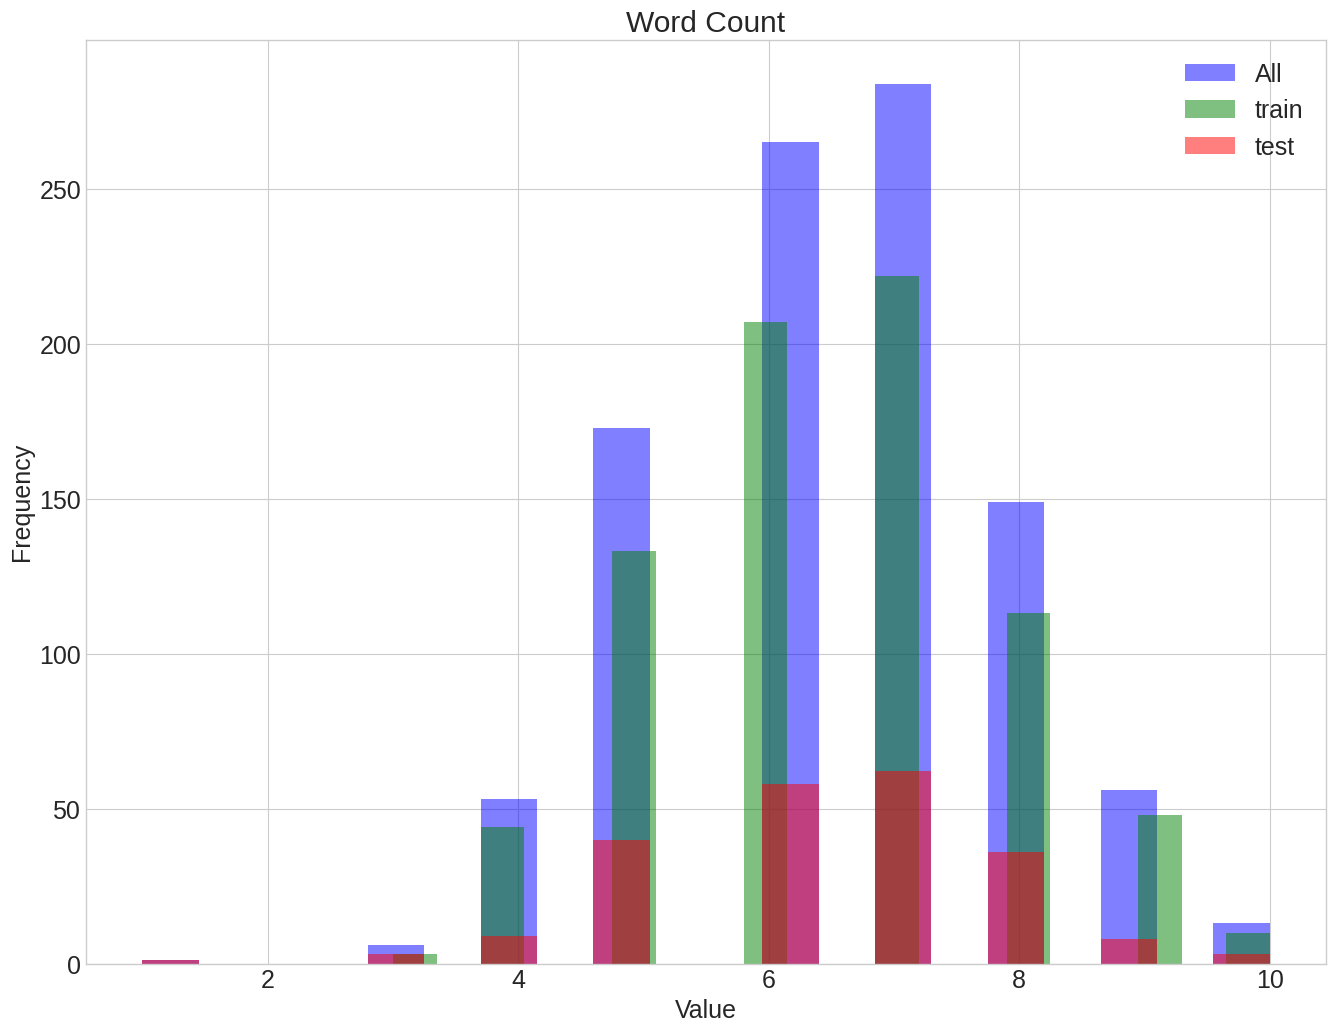

In [5]:
'''show_word_count(split1, split2) will give a histogram of the length of your data in words per row'''
viz.show_word_count(split1="train", split2="test")

In [6]:
'''print_word_count() will print the average lenght of your data in words per row.
It will also show you the max and min values'''
viz.print_word_count()

The average number of words in your text cells is 6.5
The max number of words in your text cells is 10
The smallest number of words in your text cells is 1


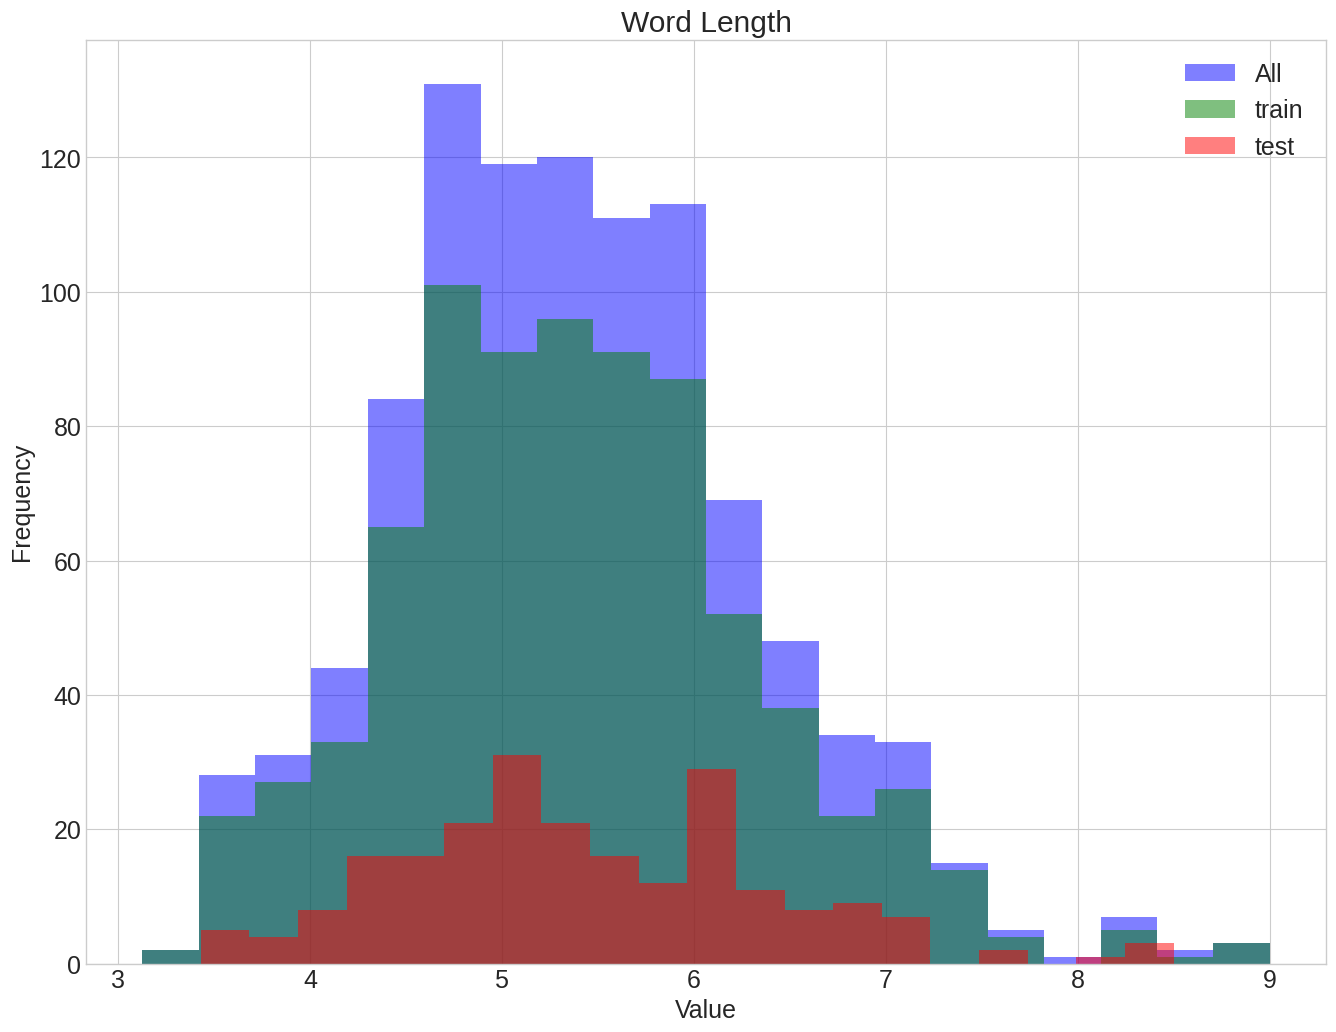

In [7]:
'''show_word_length(split1, split2) will show a histogram of the length of the words in your data in characters'''
viz.show_word_length(split1='train', split2='test')

In [8]:
'''print_word_length() will print the average length of your words in characters. 
It will also show you the max and min values.'''
viz.print_word_length()

The average number of characters of the words in your text cells is 5.409731349206352
The max number of characters of the words in your text cells is 16
The smallest number of characters of the words in your text cells is 1


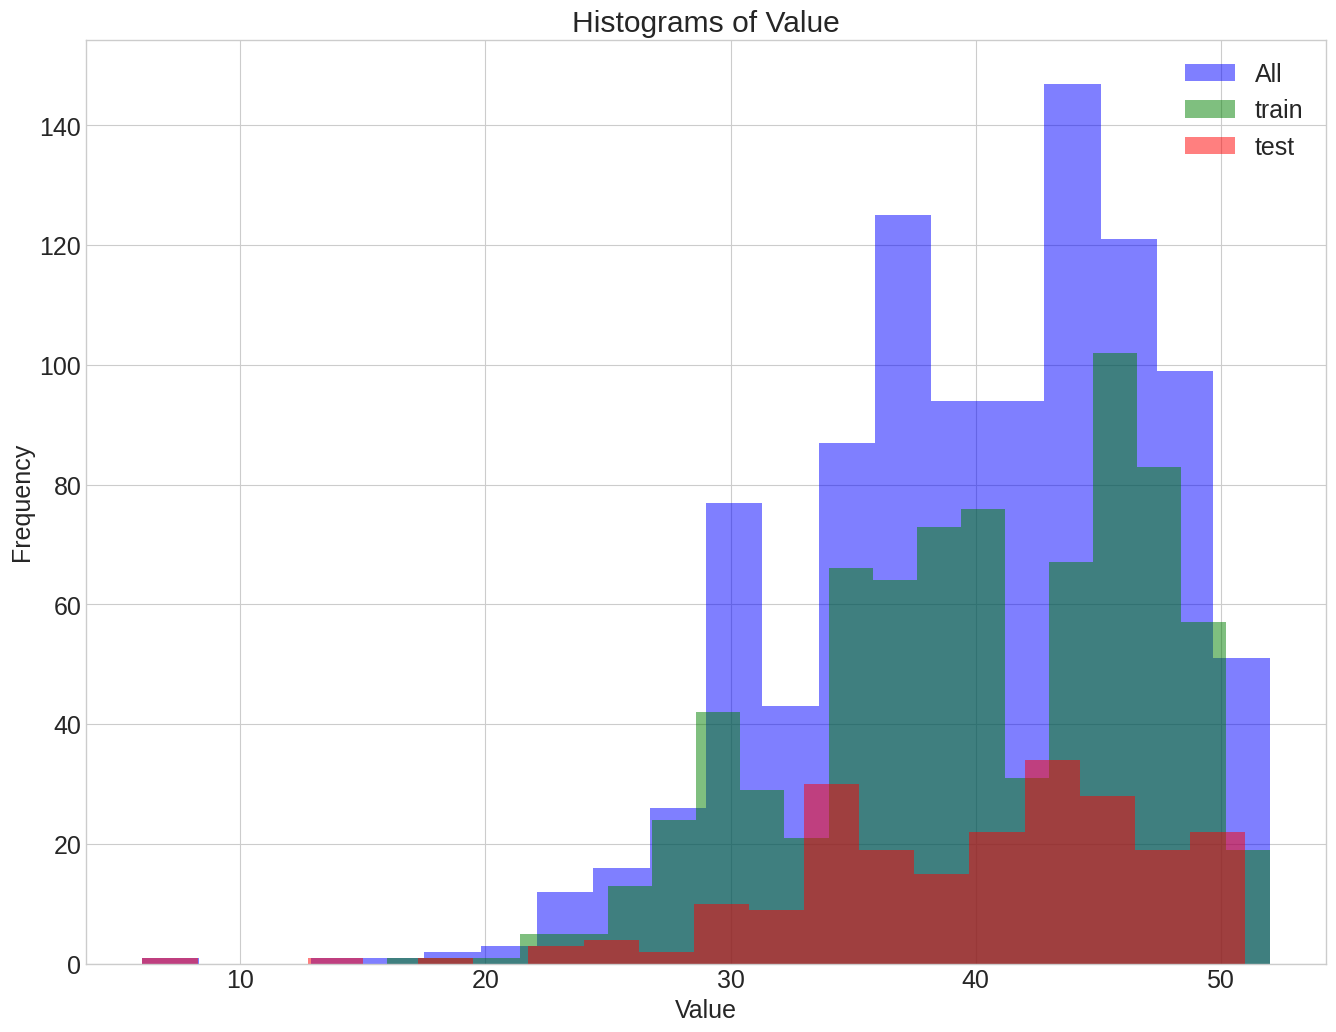

In [9]:
'''show_char_count(split1, split2) will show a histogram of the length of your data (row,column) in characters'''
viz.show_char_count(split1="train", split2="test")

In [10]:
'''print_char_count() will show the average lenght of your data in characters'''
viz.print_char_count()

The average number of characters in your text is 39.976
The max number of characters in your text is 52
The smallest number of characters in your text is 6


<BarContainer object of 10 artists>

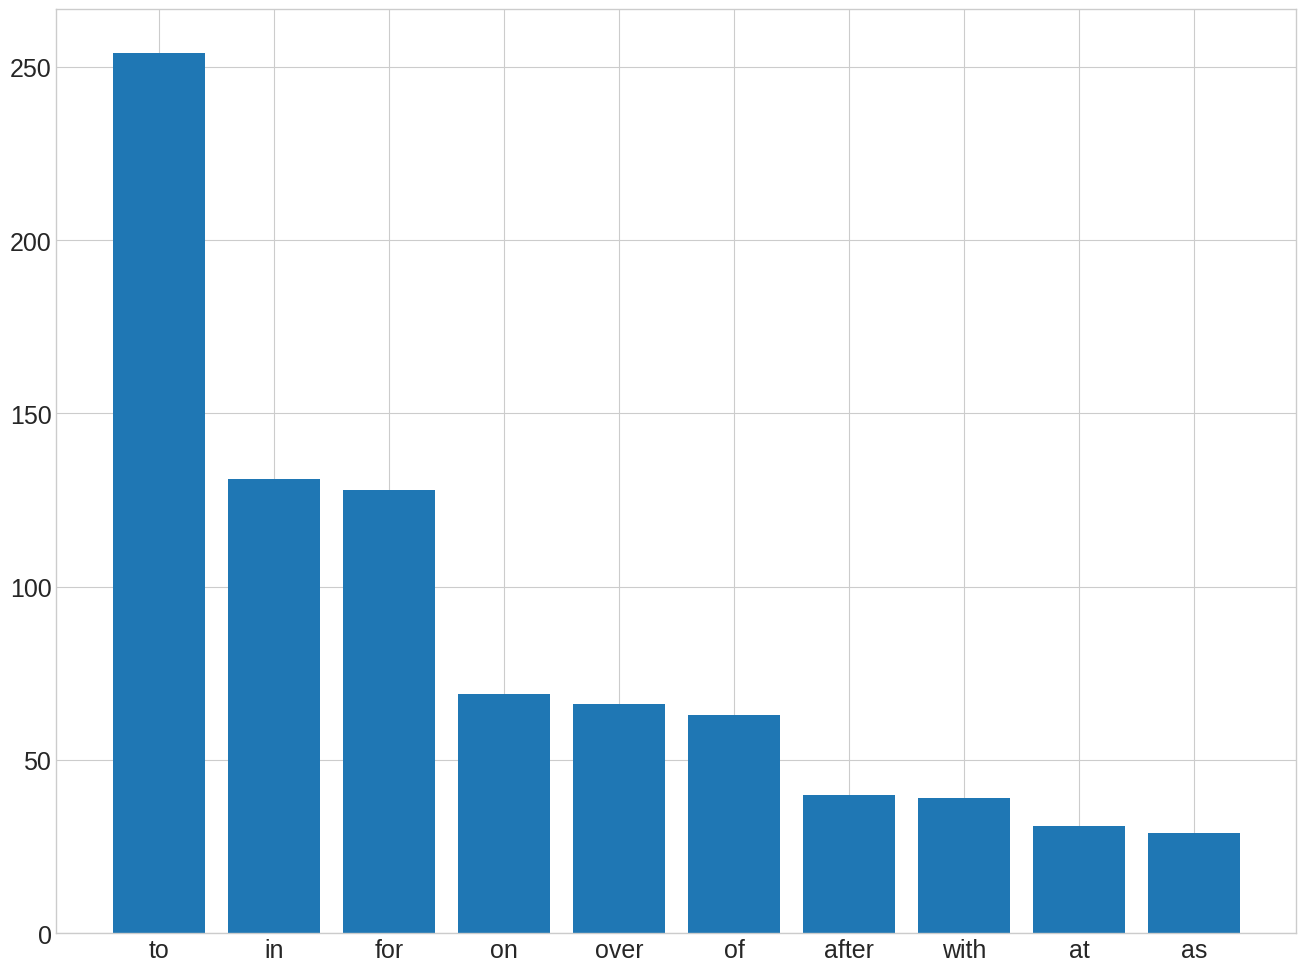

In [11]:
'''show_common_stopwords() will show the common stopwords in your data'''
viz.show_common_stopwords()

In [12]:
'''print_common_stopwords() will print the top 10 most common stopwords in your data'''
viz.print_common_stopwords()

The most common stopwords in your text cells are:
to : 254
in : 131
for : 128
on : 69
over : 66
of : 63
after : 40
with : 39
at : 31
as : 29


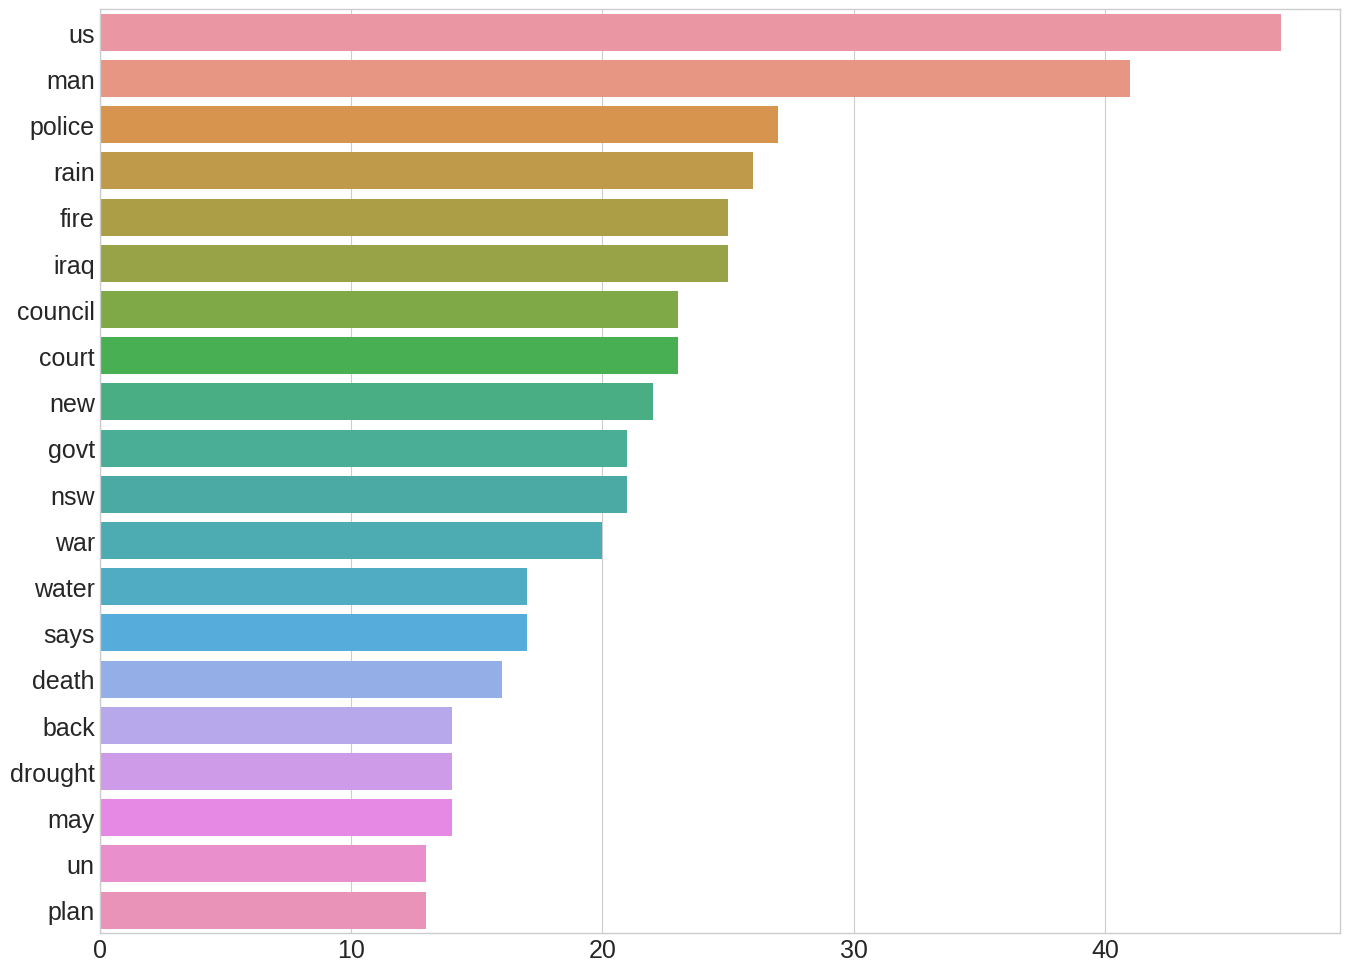

In [13]:
'''show_common_words() will show the common words (stopwords excluded) in your data'''
viz.show_common_words()

In [14]:
'''print_common_words() will print the top 20 most common non-stopwords in your data'''
viz.print_common_words()

us : 47
man : 41
police : 27
rain : 26
fire : 25
iraq : 25
council : 23
court : 23
new : 22
govt : 21
nsw : 21
war : 20
water : 17
says : 17
death : 16
back : 14
drought : 14
may : 14
un : 13
plan : 13


In [15]:
'''print_common_words_split(split1, split2) will print the top 20 most common non-stopwords for each split'''
viz.print_common_words_split(split1="train", split2="test")

Most common words in train
us : 33
man : 30
fire : 20
iraq : 20
new : 20
rain : 19
court : 18
police : 18
council : 16
war : 16
govt : 16
nsw : 16
death : 15
says : 14
back : 13
record : 11
un : 11
funds : 11
murder : 11
drought : 11
plan : 10


Most common words in test
us : 14
man : 11
police : 9
water : 8
council : 7
rain : 7
iraq : 5
nsw : 5
govt : 5
fire : 5
may : 5
court : 5
world : 5
win : 4
federal : 4
indigenous : 4
still : 4
investigate : 4
war : 4
cost : 4
warne : 4
despite : 4
million : 3
leads : 3


<AxesSubplot:>

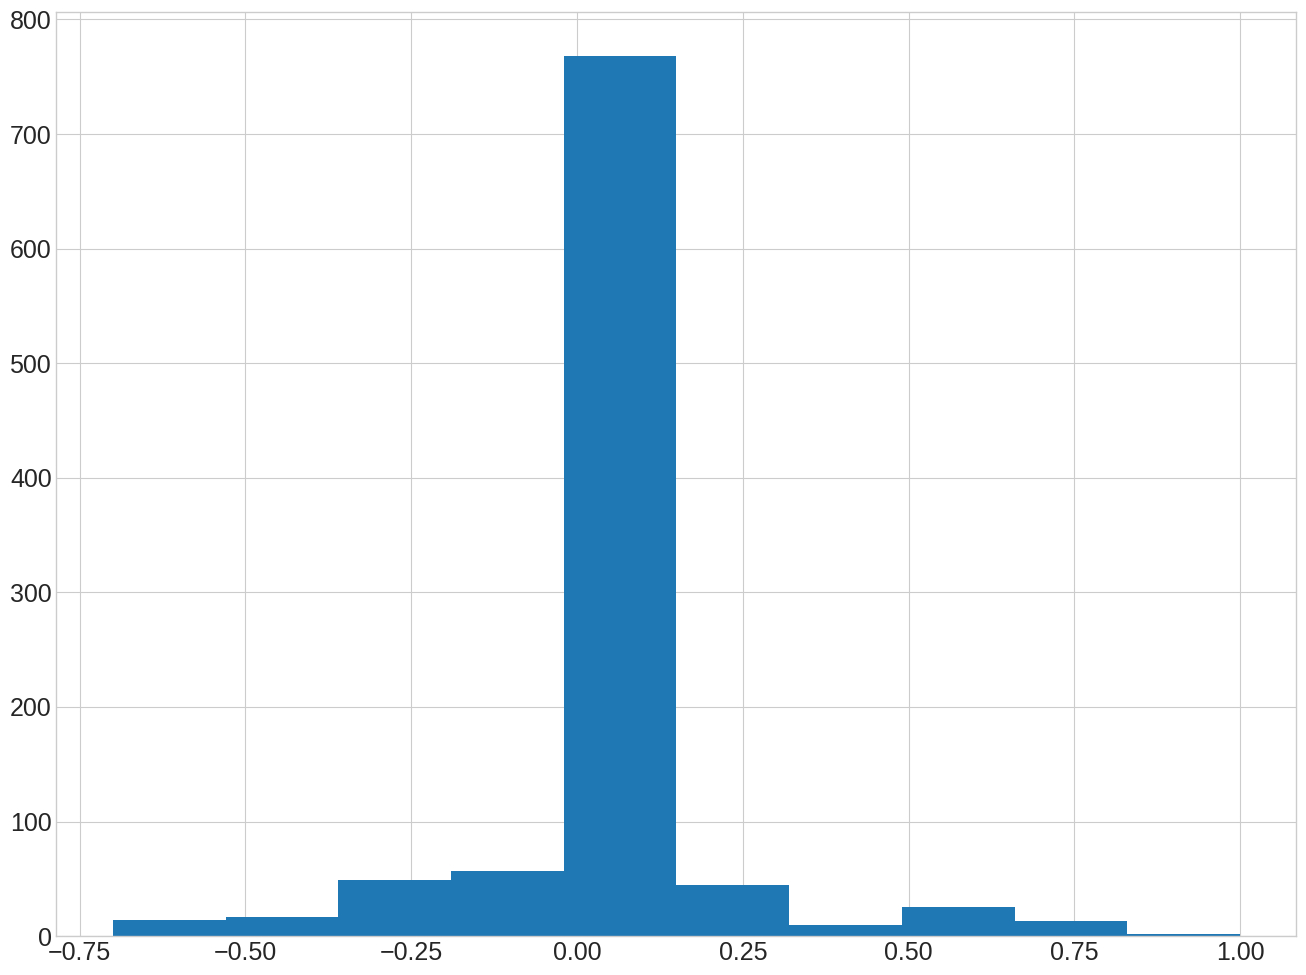

In [16]:
'''show_sentiment() will show a histogram of the sentiment of your text, with negative numbers being negative
sentiment and positive numbers being positive sentiment'''
viz.show_sentiment()

<BarContainer object of 3 artists>

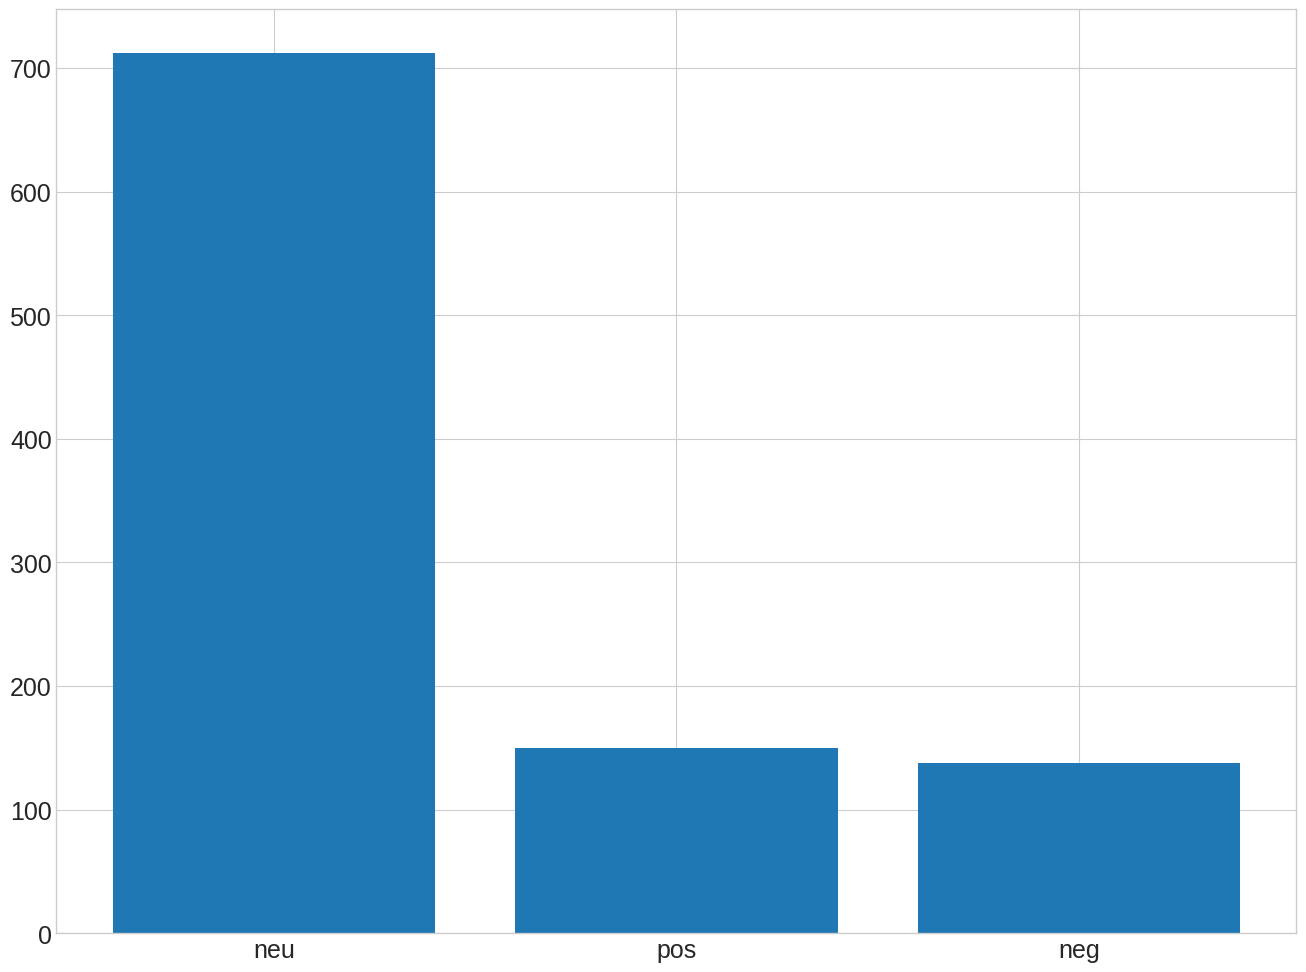

In [17]:
'''show_sentiment_cats() will show a bar chart of the sentiment of your text cells'''
viz.show_sentiment_cats()

In [18]:
'''show_neg_sentiment() and show_pos_sentiment() print you the top five most negative and positive cells in your text respectively'''
# viz.print_neg_sentiment()
viz.print_pos_sentiment()

1     act fire witnesses must be aware of defamation
5                  ambitious olsson wins triple jump
6         antic delighted with record breaking barca
18        bryant leads lakers to double overtime win
26      commonwealth bank cuts fixed home loan rates
Name: headline_text, dtype: object

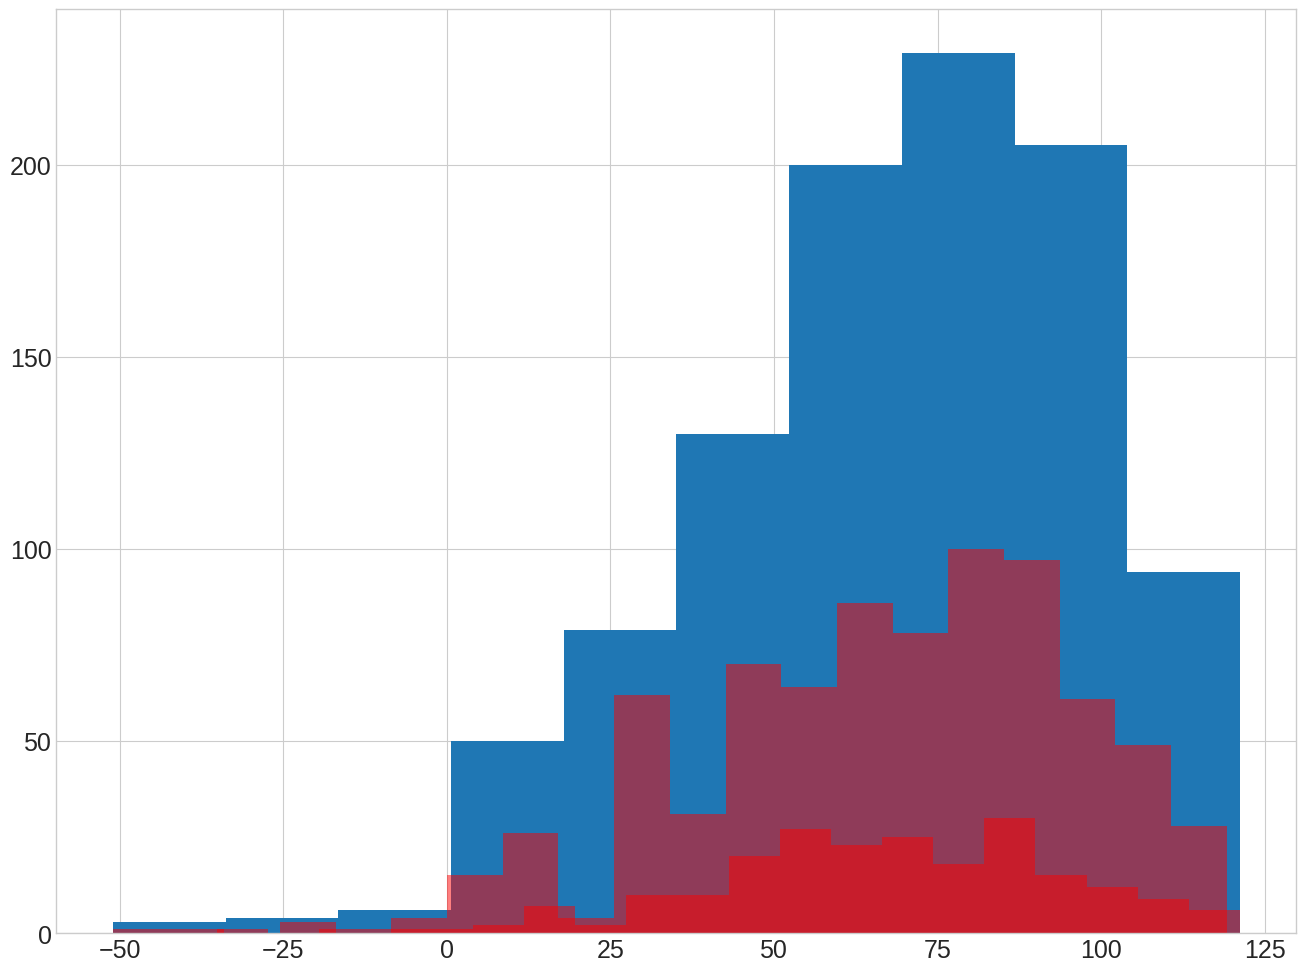

In [19]:
'''show_flesch_kincaid(split1, split2) shows the Flesch-Kincaid scores of your text cells'''
viz.show_flesch_kincaid(split1='train', split2='test')

In [20]:
'''print_flesch_kincaid() prints the average, min, and max Flesch-Kincaid scores'''
viz.print_flesch_kincaid()

The average Flesch-Kincaid score for your text is 68.17917000000003
The max Flesch-Kincaid score for your text is 121.22
The min Flesch-Kincaid score for your text is -51.03


<AxesSubplot:>

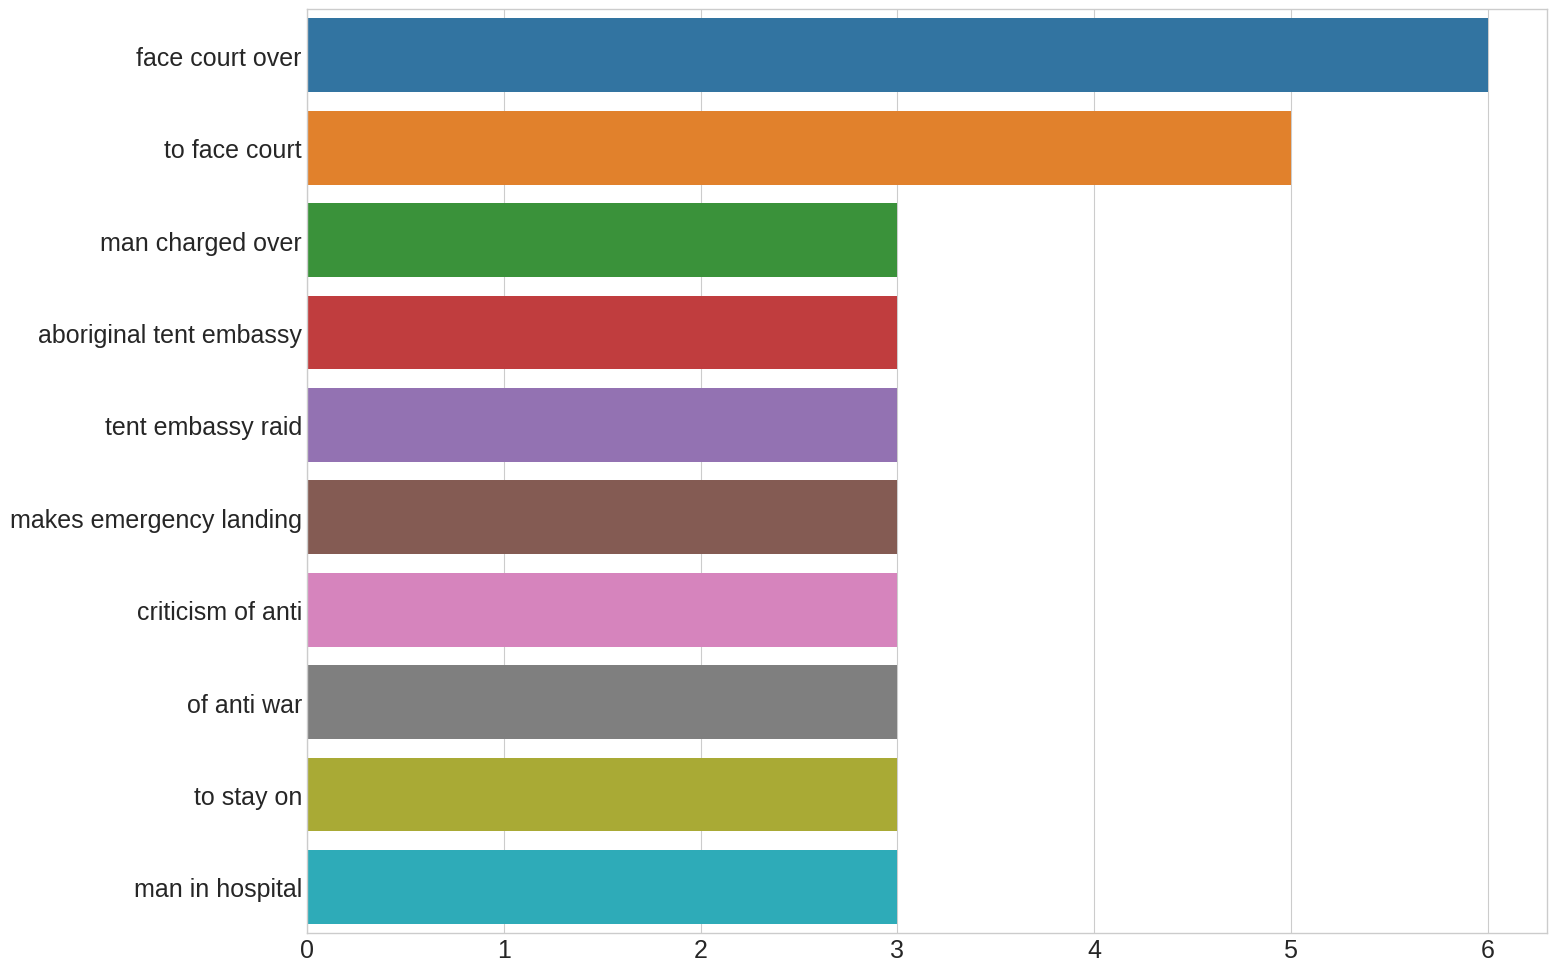

In [21]:
'''show_bi_grams() shows the common bi-grams in your text'''
'''show_tri_grams() shows the commmon tri-grams in your text'''
viz.show_tri_grams()

In [22]:
'''print_bi_grams() prints top 20 most common bi-grams in your text'''
'''print_tri_grams() prints top 20 most common tri-grams in your text'''
viz.print_bi_grams()

The most common bi-grams in your text are:
to face : 9
court over : 9
to be : 9
calls for : 8
urged to : 8
man charged : 7
expected to : 6
face court : 6
killed in : 6
charged with : 6


In [27]:
'''print_bi_grams_split(split1, split2) prints the top 10 most common bi-grams for your defined splits''' 
'''print_tri_grams_split(split1, split2) prints the top 10 most common tri-grams for your defined splits''' 
viz.print_bi_grams_split(split1="train", split2="test")
# viz.print_tri_grams_split(split1="train", split2="test")

The most common bi-grams in your train text are:
court over : 8
to be : 8
to face : 7
calls for : 6
urged to : 6
man charged : 6
killed in : 6
expected to : 5
injured in : 5
gold coast : 5


The most common bi-grams in your test text are:
after stabbing : 3
urged to : 2
ambulance levy : 2
water restrictions : 2
calls for : 2
plan to : 2
to investigate : 2
to face : 2
to visit : 2
man who : 2


In [24]:
'''viz.topic_model() will show you a topic model of your data from pyLDAvis'''
viz.topic_model()

/home/eanthony/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/eanthony/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/eanthony/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/eanthony/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/eanthony/anaconda3/lib/python3.9/site-packa

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.123895 -0.210840       1        1  15.610226
4     -0.239523 -0.091406       2        1  15.129563
3      0.022457  0.050014       3        1  10.034948
2      0.012442  0.054578       4        1   9.767330
1      0.028225  0.021975       5        1   8.887281
5      0.008848  0.029584       6        1   8.879637
9      0.010694  0.044721       7        1   8.670430
0      0.006851  0.042388       8        1   8.269849
6      0.006676  0.029076       9        1   7.398760
7      0.019435  0.029911      10        1   7.351978, topic_info=         Term       Freq      Total Category  logprob  loglift
754        us  64.000000  64.000000  Default  30.0000  30.0000
291    police  25.000000  25.000000  Default  29.0000  29.0000
501      says  21.000000  21.000000  Default  28.0000  28.0000
353       man  30.000000  30.000000  Default  27.0000  27.0000
45       iraq  27.000000  27.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
1957  trading   2.609804   3.663326  Topic10  -5.0084   2.2711
383   alinghi   1.872070   2.678272  Topic10  -5.3407   2.2521
1415   dreams   1.934967   2.792133  Topic10  -5.3076   2.2435
800      wine   1.699822   2.559755  Topic10  -5.4372   2.2008
1580   league   1.844118   2.791616  Topic10  -5.3557   2.1956

[353 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
53        2  0.849103        10
263       2  0.760506   accused
5         8  0.878291       act
1294      9  0.933675  adelaide
61        7  0.915023     ahead
...     ...       ...       ...
257       7  0.880888      work
1032      4  0.763257    worker
523       1  0.955590     world
1482      5  0.805145     years
471       1  0.947693  zimbabwe

[339 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 4, 3, 2, 6, 10, 1, 7, 8])

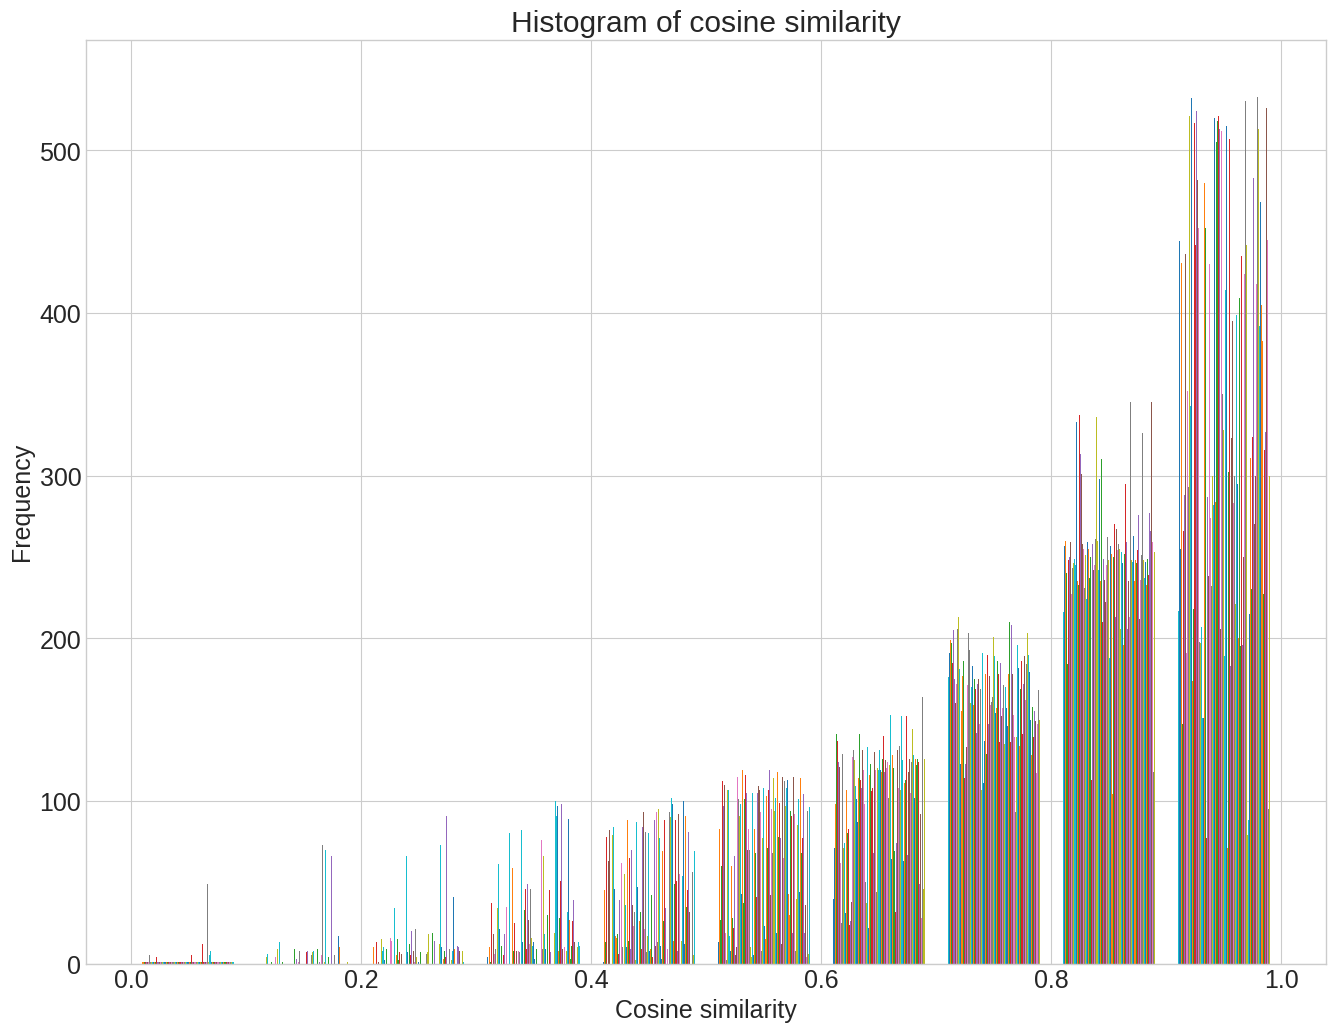

In [25]:
'''show_cosine_sim will show you a histogram of the cosine similarities of the provided sentence vectors in your data
This function will take the following input:
v (column name): A column of 1D numpy arrays representing vectors.'''
viz.show_cosine_sim(v = 'vectors')

In [26]:
'''find_outliers_knn will use the KNN algorithm to perform unsupervised learning on your data and show you the outliers in your data.
This function takes the following inputs:
v (column name): A column of 1D numpy arrays representing vectors.
k (int): The number of nearest neighbors to consider for each vector. Defaults to 5.
threshold (float): The threshold for determining outliers based on the median distance to k-nearest neighbors. Defaults to 3.0.'''
viz.find_outliers_knn(v = 'vectors', k = 5)

[]